https://m.blog.naver.com/sogangori/221091518432

In [1]:
from torchvision.transforms import *

from PIL import Image
from random import *
import math
import numpy as np
import torch
import cv2


In [43]:
img='syn_01294.png'

label_path = img.replace('.png','.txt') 
label = open(label_path,'r') #label file을 open해서 읽는다 
img2 = cv2.imread(img)
list=label.readline()


In [56]:
for i in range(3):#저는 cutout 이미지를 3개 만들고 싶어서 for문을 3번 실행시켰습니다.

    while(list):#바운딩 박스 당 
      list=list.split()
      x_center=float(list[1])
      y_center=float(list[2])
      width=float(list[3])*1920
      height=float(list[4])*1040
      x_center_new=x_center*1920
      y_center_new=y_center*1040
      
       #print(x_center_new,y_center_new)
      x1=uniform(x_center_new-width/2,x_center_new+width/4)
      y1=uniform(y_center_new-height/2,y_center_new+height/4)
      ran1=randint(2,5)
      ran2=randint(2,5)
      mark1=width/ran1
      mark2=height/ran2
      x2=x1+mark1
      y2=y1+mark2
      x1=int(x1)
      x2=int(x2)
      y1=int(y1)
      y2=int(y2)
      color_int=randint(0,255)
     #print(x1," ",y1," ",x2," ",y2)       
      img2 = cv2.rectangle(img2, (x1, y1), (x2,y2), (color_int, color_int, color_int), cv2.FILLED)  #원래 있던 사진  + 박스추가 + 박스추가 ..
      list=label.readline() #다음 바운딩 박스를 위해 다음 줄을  읽는다.  
    #cv2_imshow(cutout)
    label = open(label_path,'r') #label file을 open해서 읽는다 
    list=label.readline()
    cv2.imwrite(str(i)+img,img2)
    img2 = cv2.imread(img)



    #라벨 복사 

3
2
77.66666666666667
130.5
2
4
116.5
65.25
3
4
77.66666666666667
65.25


In [44]:
for i in range(3):#저는 cutout 이미지를 3개 만들고 싶어서 for문을 3번 실행시켰습니다.

    while(list):#바운딩 박스 당 
      list=list.split()
      x_center=float(list[1])
      y_center=float(list[2])
      width=float(list[3])*1920
      height=float(list[4])*1040
      x_center_new=x_center*1920
      y_center_new=y_center*1040
      
       #print(x_center_new,y_center_new)
      x1=uniform(x_center_new-width/2,x_center_new+width/4)
      y1=uniform(y_center_new-height/2,y_center_new+height/4)

      mark=width/2
      x2=x1+mark
      y2=y1+mark
      x1=int(x1)
      x2=int(x2)
      y1=int(y1)
      y2=int(y2)
     #print(x1," ",y1," ",x2," ",y2)       
      img2 = cv2.rectangle(img2, (x1, y1), (x2,y2), (0, 0, 0), cv2.FILLED)  #원래 있던 사진  + 박스추가 + 박스추가 ..
      list=label.readline() #다음 바운딩 박스를 위해 다음 줄을  읽는다.  
    #cv2_imshow(cutout)
    label = open(label_path,'r') #label file을 open해서 읽는다 
    list=label.readline()
    cv2.imwrite(str(i)+img,img2)
    img2 = cv2.imread(img)
    print(list)



    #라벨 복사 

28 0.640625 0.4355769230769231 0.15208333333333332 0.2846153846153846

28 0.640625 0.4355769230769231 0.15208333333333332 0.2846153846153846

28 0.640625 0.4355769230769231 0.15208333333333332 0.2846153846153846



In [3]:
probability = 0.5
mean=[0.4914, 0.4822, 0.4465]
sl = 0.02
sh = 0.1
r1 = 0.5
    
def rand_(img):

    if random.uniform(0, 1) > probability:
        return img

    for attempt in range(100):
        area = img.size()[1] * img.size()[2]
    
        target_area = random.uniform(sl, sh) * area
        aspect_ratio = random.uniform(r1, 1/r1)

        h = int(round(math.sqrt(target_area * aspect_ratio)))
        w = int(round(math.sqrt(target_area / aspect_ratio)))

        if w < img.size()[2] and h < img.size()[1]:
            x1 = random.randint(0, img.size()[1] - h)
            y1 = random.randint(0, img.size()[2] - w)
            if img.size()[0] == 3:
                img[0, x1:x1+h, y1:y1+w] = mean[0]
                img[1, x1:x1+h, y1:y1+w] = mean[1]
                img[2, x1:x1+h, y1:y1+w] = mean[2]
            else:
                img[0, x1:x1+h, y1:y1+w] = mean[0]
            return img

    return img


In [ ]:

img = cv2.imread(img_path)
img=torch.Tensor(img)
img=img.permute(2,0,1)
img.size()

In [106]:
e_img=erase(img)
e_img.size()

torch.Size([3, 1040, 1920])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


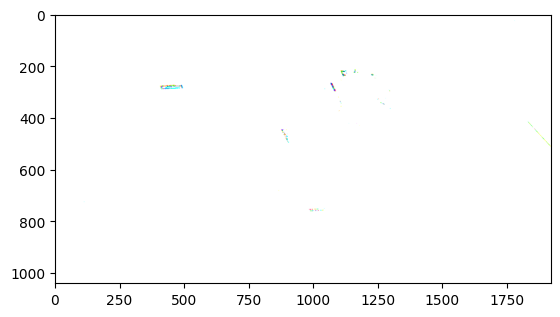

In [60]:
import matplotlib.pyplot as plt
plt.imshow(e_img.permute(1, 2, 0))

plt.show()

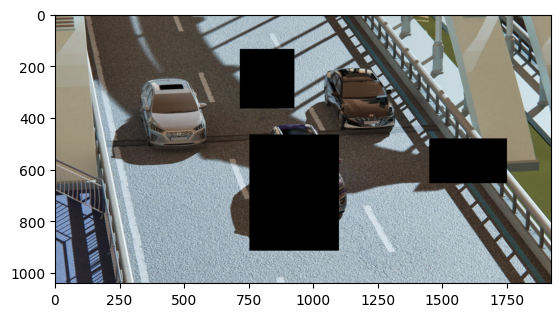

In [107]:
e_img2=e_img.permute(1, 2, 0)
plt.imshow(e_img2/255.0)
plt.show()